Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption .


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('takehome_users.csv')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
import datetime

users['creation_time'] = pd.to_datetime(users['creation_time'])
#https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date
users['last_session_creation_time'] = users['last_session_creation_time'].map(lambda data: 
                                    datetime.datetime.fromtimestamp(int(data)).strftime('%Y-%m-%d %H:%M:%S'), na_action='ignore')
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])


users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 23:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 23:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 19:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 04:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 05:14:20,0,0,193,5240.0


In [5]:
never_used = np.where(users.last_session_creation_time.isna())
never_used_df = users.iloc[never_used]
never_used_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN
11,12,2014-04-17 23:48:38,Mathiesen L�rke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN
15,16,2013-02-11 10:09:50,Engel Ren�,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN


In [6]:
never_used_df.creation_source.value_counts()

PERSONAL_PROJECTS    1347
ORG_INVITE           1066
GUEST_INVITE          575
SIGNUP                189
Name: creation_source, dtype: int64

In [7]:
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [10]:
total_visit = engagement.groupby('user_id').sum()
total_visit.head()

,visited
user_id,
1,1
2,14
3,1
4,1
5,1


In [11]:
freq_visitors = total_visit.visited[total_visit.visited >= 3]
freq_visitors.head()

user_id
2      14
10    284
20      7
33     18
42    342
Name: visited, dtype: int64

In [12]:
most_freq_visits = engagement[engagement.user_id.isin(freq_visitors.index)]
most_freq_visits.reset_index(inplace = True, drop=True)
most_freq_visits.head()

,time_stamp,user_id,visited
0,2013-11-15 03:45:04,2,1
1,2013-11-29 03:45:04,2,1
2,2013-12-09 03:45:04,2,1
3,2013-12-25 03:45:04,2,1
4,2013-12-31 03:45:04,2,1


In [13]:
def numOfDays(date1, date2):
    return (date2-date1).days

In [14]:
def find_adopted(x):
    
    df_user = engagement[engagement['user_id'] == x]
    
    adopted_user = 0
    #print(df_user)
    for i in range(len(df_user) - 2):
        
        if numOfDays(df_user.iloc[i][0], df_user.iloc[i + 2][0]) <= 7:
            adopted_user =  1
            break;
        else:
            adopted_user = 0
    return adopted_user
    


In [15]:
users['adopted_users'] = users['object_id'].apply(find_adopted)

In [16]:
users.adopted_users.value_counts()

0    10344
1     1656
Name: adopted_users, dtype: int64

In [17]:
users.head(-11)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 23:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 23:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 19:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 04:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 05:14:20,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11984,11985,2013-07-08 17:23:26,Jespersen Marcus,MarcusTJespersen@cuvox.de,PERSONAL_PROJECTS,NaT,0,0,74,NaN,0
11985,11986,2012-06-24 01:02:14,Ribeiro Clara,ClaraBarrosRibeiro@gmail.com,SIGNUP_GOOGLE_AUTH,2012-06-30 21:02:14,0,0,111,NaN,0
11986,11987,2013-03-15 03:21:01,Reed Poppy,ftdkorrj@uyhoy.com,SIGNUP,2013-03-14 23:21:01,0,0,1,NaN,0
11987,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,2014-06-01 07:04:47,0,0,114,NaN,1


In [18]:
users_source = ['PERSONAL_PROJECTS', 'GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'SIGNUP_GOOGLE_AUTH']
users['creation_source'] = users.creation_source.replace(users_source, [0, 1, 2, 3, 4])
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1,2014-04-21 23:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2,2014-03-30 23:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2,2013-03-19 19:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1,2013-05-22 04:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1,2013-01-22 05:14:20,0,0,193,5240.0,0


In [19]:
users.dropna(subset=['last_session_creation_time'], inplace=True)

In [20]:
users.fillna({'invited_by_user_id': 0}, inplace=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   int64         
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          8823 non-null   float64       
 10  adopted_users               8823 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(2)
m

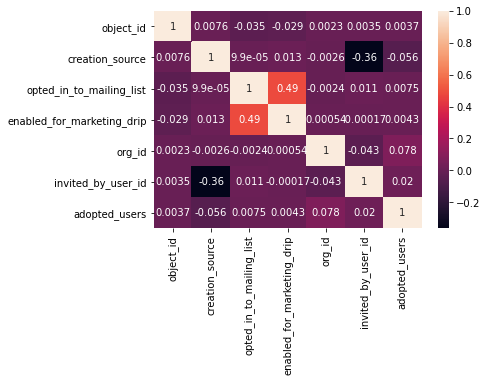

In [21]:
_ = sns.heatmap(users.corr(), annot=True)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [23]:
y = users.adopted_users
X = users[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id','invited_by_user_id']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
params = [0.001, 0.01, 0.1, 1, 10, 100]

accuracies = {}

for i in params:
    lr = LogisticRegression(C= i, random_state= 123)
    lr.fit(X_train, y_train)
    
    y_lr_pred = lr.predict(X_test)
    
    acc_score = accuracy_score(y_test, y_lr_pred)
    accuracies[i] = acc_score
accuracies

{0.001: 0.8118766999093382,
 0.01: 0.8118766999093382,
 0.1: 0.8118766999093382,
 1: 0.8118766999093382,
 10: 0.8118766999093382,
 100: 0.8118766999093382}

In [26]:
lr2 = LogisticRegression(C=0.01)
lr2.fit(X_train, y_train)

print(confusion_matrix(y_test, y_lr_pred))
print(lr2.score(X_test, y_test))

[[1791    0]
 [ 415    0]]
0.8118766999093382


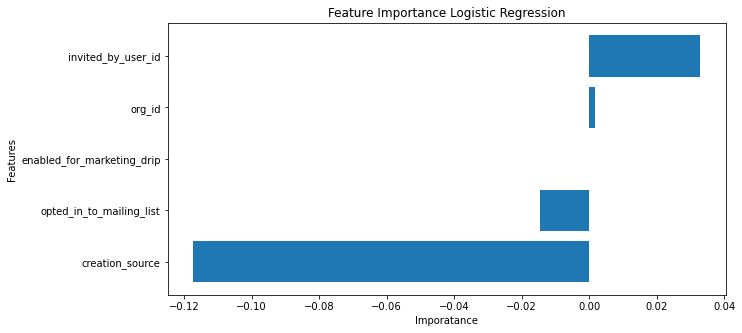

In [27]:
features = X
importances = list(lr2.coef_[0])
sort_import = np.sort(importances)

plt.figure(figsize=(10, 5))
index = [0, 1, 2, 3, 4]
_ = plt.barh(index, sort_import, align='center')
plt.xlabel('Imporatance')
plt.yticks(index, features)
plt.ylabel('Features')
plt.title('Feature Importance Logistic Regression')
plt.show()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
estimators = [10, 25, 50, 75, 100]

rf_scores = {}

for i in estimators:
    rf = RandomForestClassifier(n_estimators=i, criterion='entropy', random_state=123 )
    rf.fit(X_train, y_train)
    
    y_rf_predict = rf.predict(X_test)
    
    acc_rf_score = accuracy_score(y_test, y_rf_predict)
    rf_scores[i] = acc_rf_score
rf_scores

{10: 0.757026291931097,
 25: 0.7470534904805077,
 50: 0.757479601087942,
 75: 0.757026291931097,
 100: 0.7588395285584769}

In [30]:
rf2 = RandomForestClassifier(n_estimators=75, criterion='entropy', random_state=42)
rf2.fit(X_train, y_train)

print(confusion_matrix(y_test, y_rf_predict))
print(rf2.score(X_test, y_test))
print(classification_report(y_test, y_rf_predict))


[[1616  175]
 [ 357   58]]
0.7529465095194923
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1791
           1       0.25      0.14      0.18       415

    accuracy                           0.76      2206
   macro avg       0.53      0.52      0.52      2206
weighted avg       0.71      0.76      0.73      2206



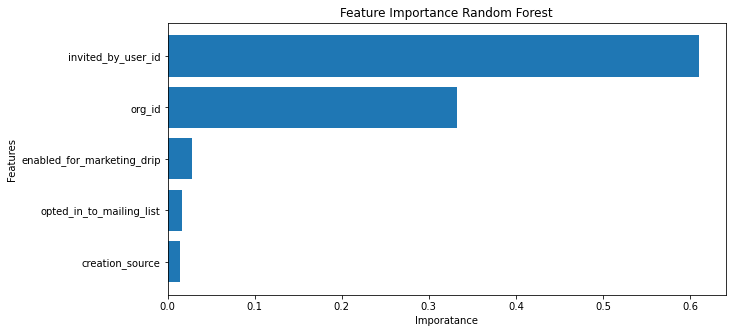

In [31]:
features = X
importances = list(rf2.feature_importances_)
sort_import = np.sort(importances)

plt.figure(figsize=(10, 5))
index = [0, 1, 2, 3, 4]
_ = plt.barh(index, sort_import, align='center')
plt.xlabel('Imporatance')
plt.yticks(index, features)
plt.ylabel('Features')
plt.title('Feature Importance Random Forest')
plt.show()

# Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_gb_predict = gb.predict(X_test)

print(confusion_matrix(y_test, y_gb_predict))
print(gb.score(X_test, y_test))
print(classification_report(y_test, y_gb_predict))

[[1787    4]
 [ 414    1]]
0.8105167724388033
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1791
           1       0.20      0.00      0.00       415

    accuracy                           0.81      2206
   macro avg       0.51      0.50      0.45      2206
weighted avg       0.70      0.81      0.73      2206



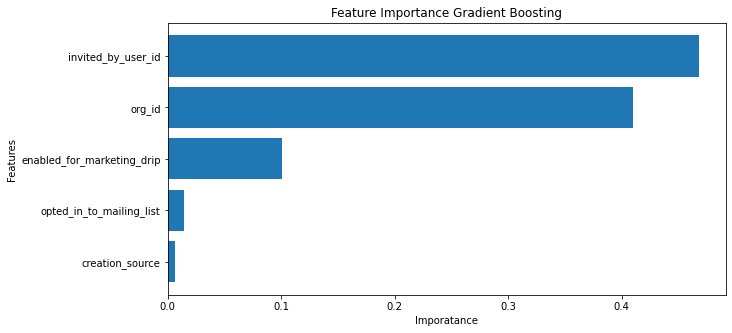

In [34]:
features = X
importances = list(gb.feature_importances_)
sort_import = np.sort(importances)

plt.figure(figsize=(10, 5))
index = [0,1,2, 3, 4]
_ = plt.barh(index, sort_import, align='center')
plt.xlabel('Imporatance')
plt.yticks(index, features)
plt.ylabel('Features')
plt.title('Feature Importance Gradient Boosting')
plt.show()